### Downloading the housing dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load the California Housing dataset from scikit-learn
from sklearn import datasets
housingX, housingy = datasets.fetch_california_housing (
    return_X_y=True, as_frame=True
)

In [3]:
housingX.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
housingy.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

### Exploring the dataset by making graphs

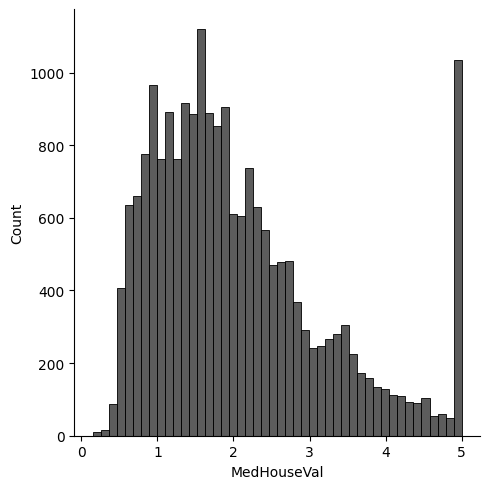

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("dark:grey")
sns.displot(housingy, kind="hist")

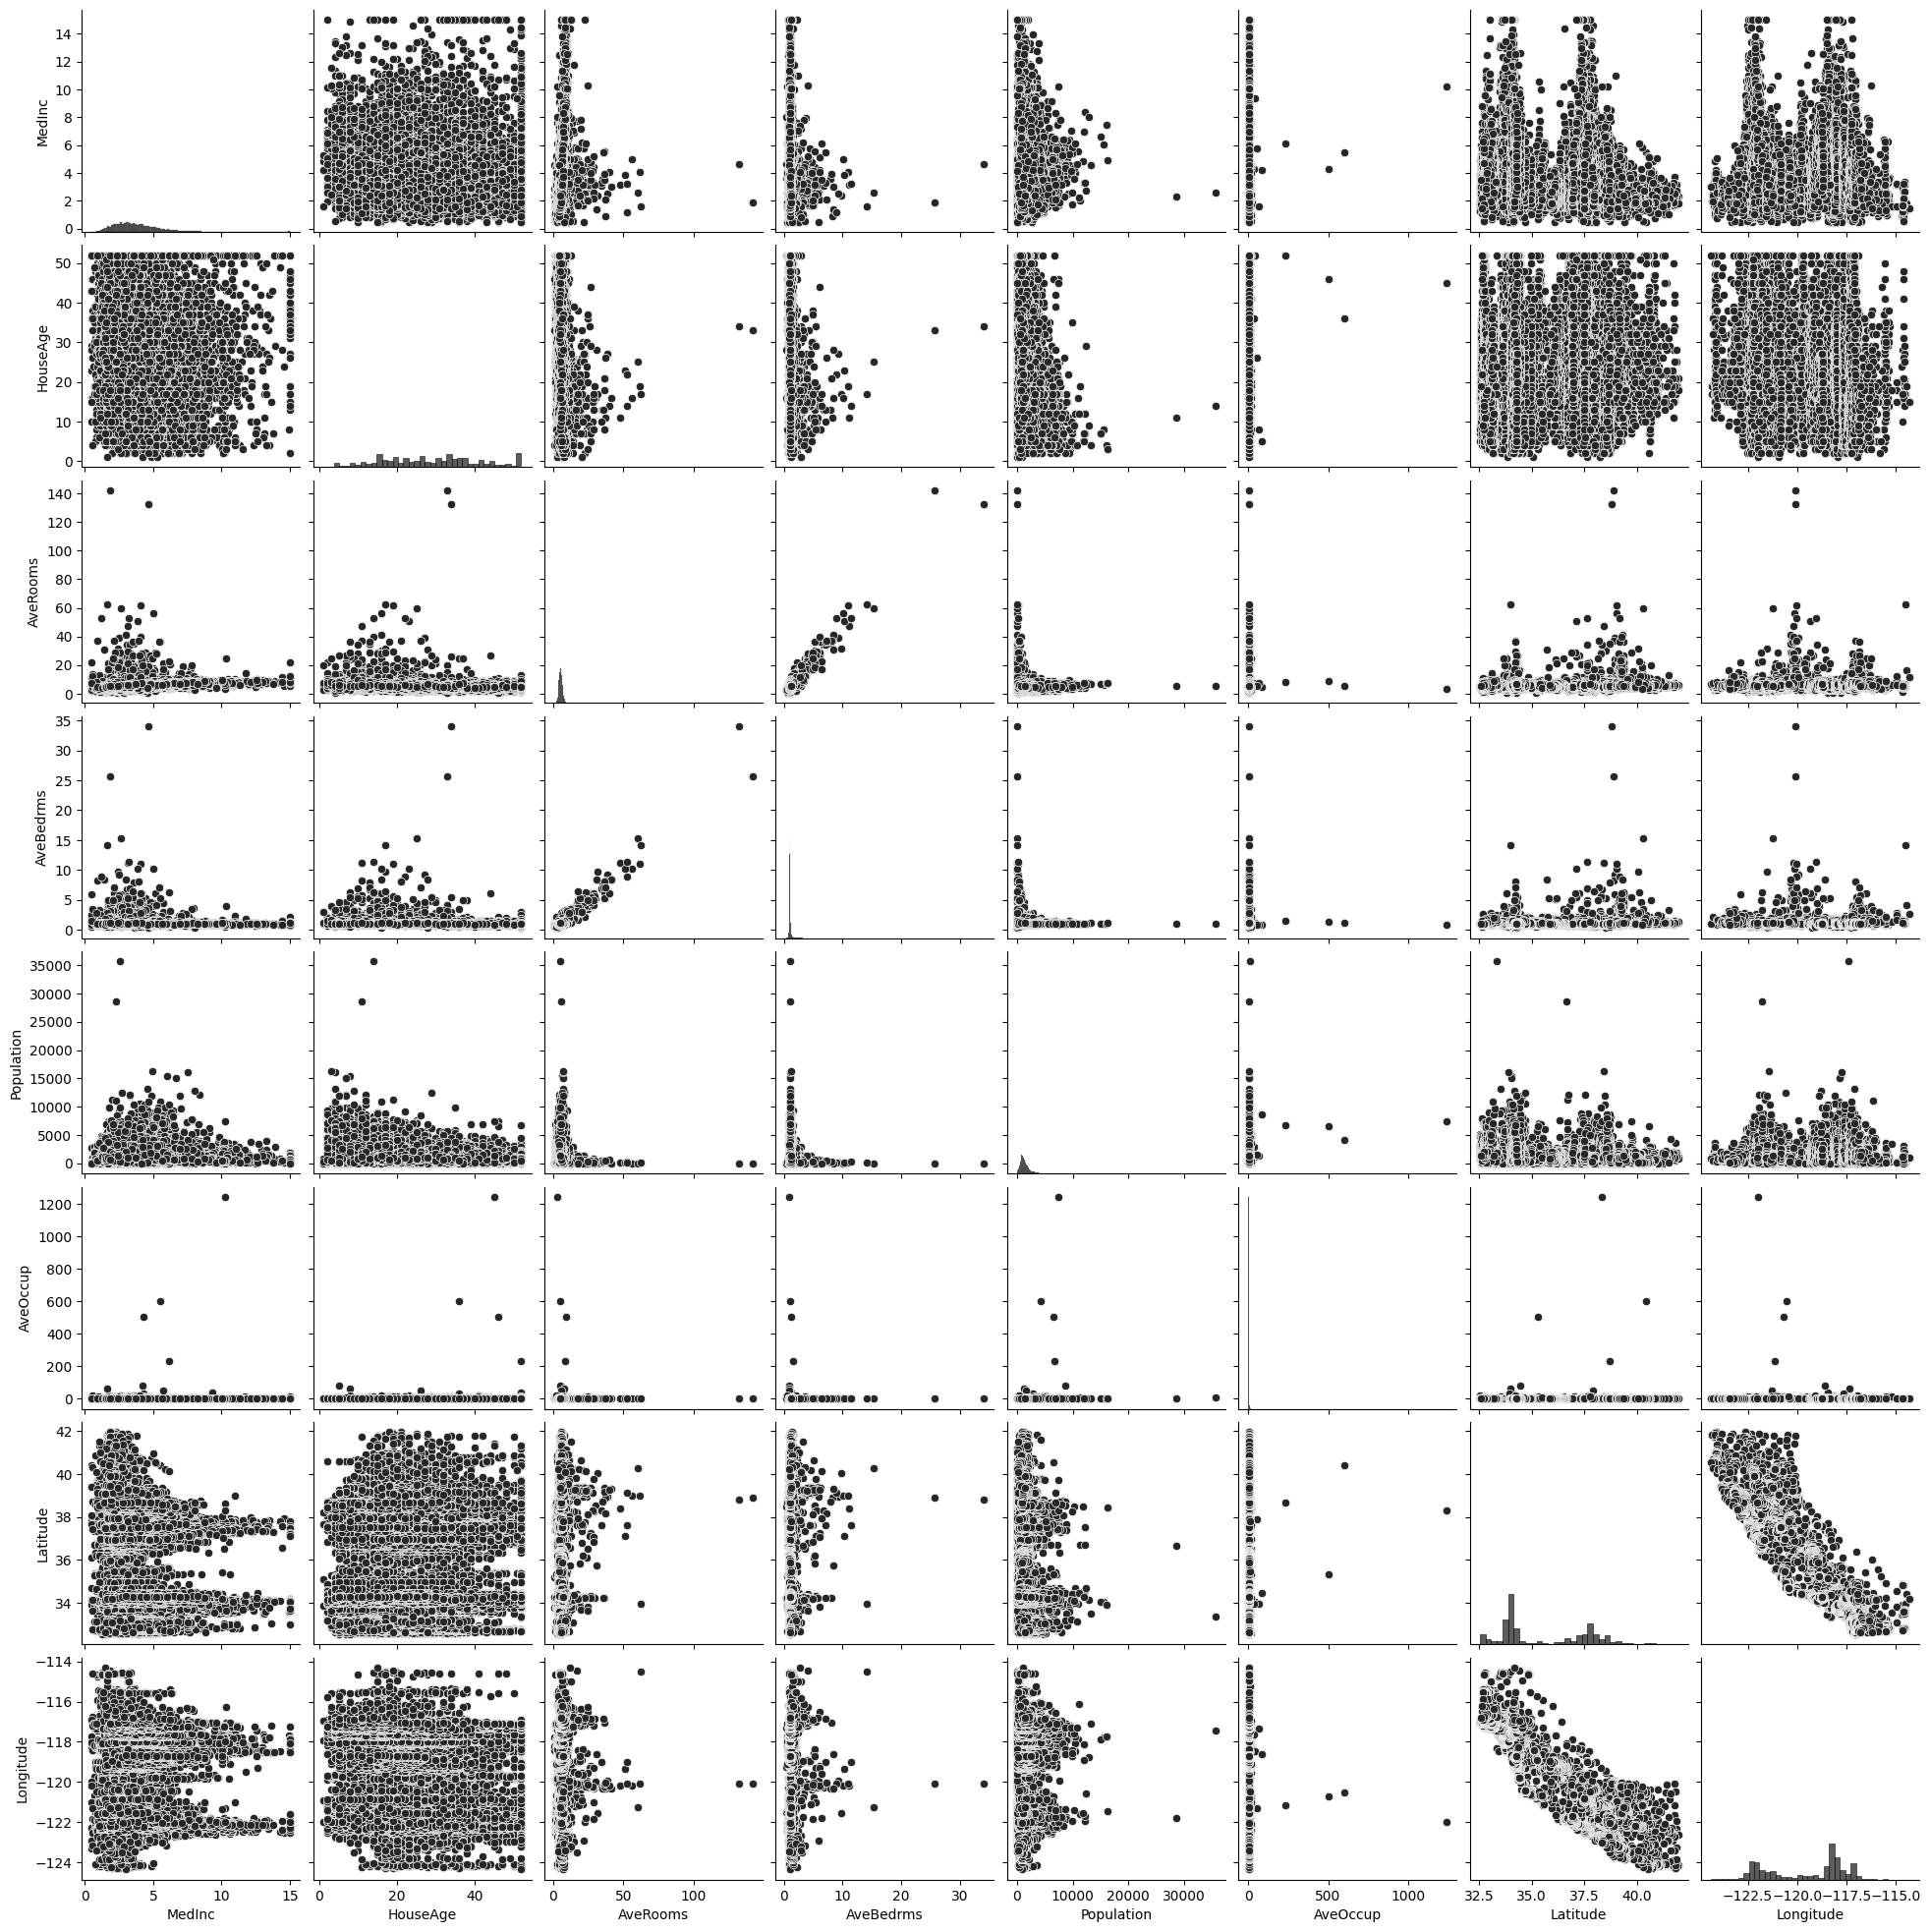

In [6]:
graphx = sns.pairplot(housingX)

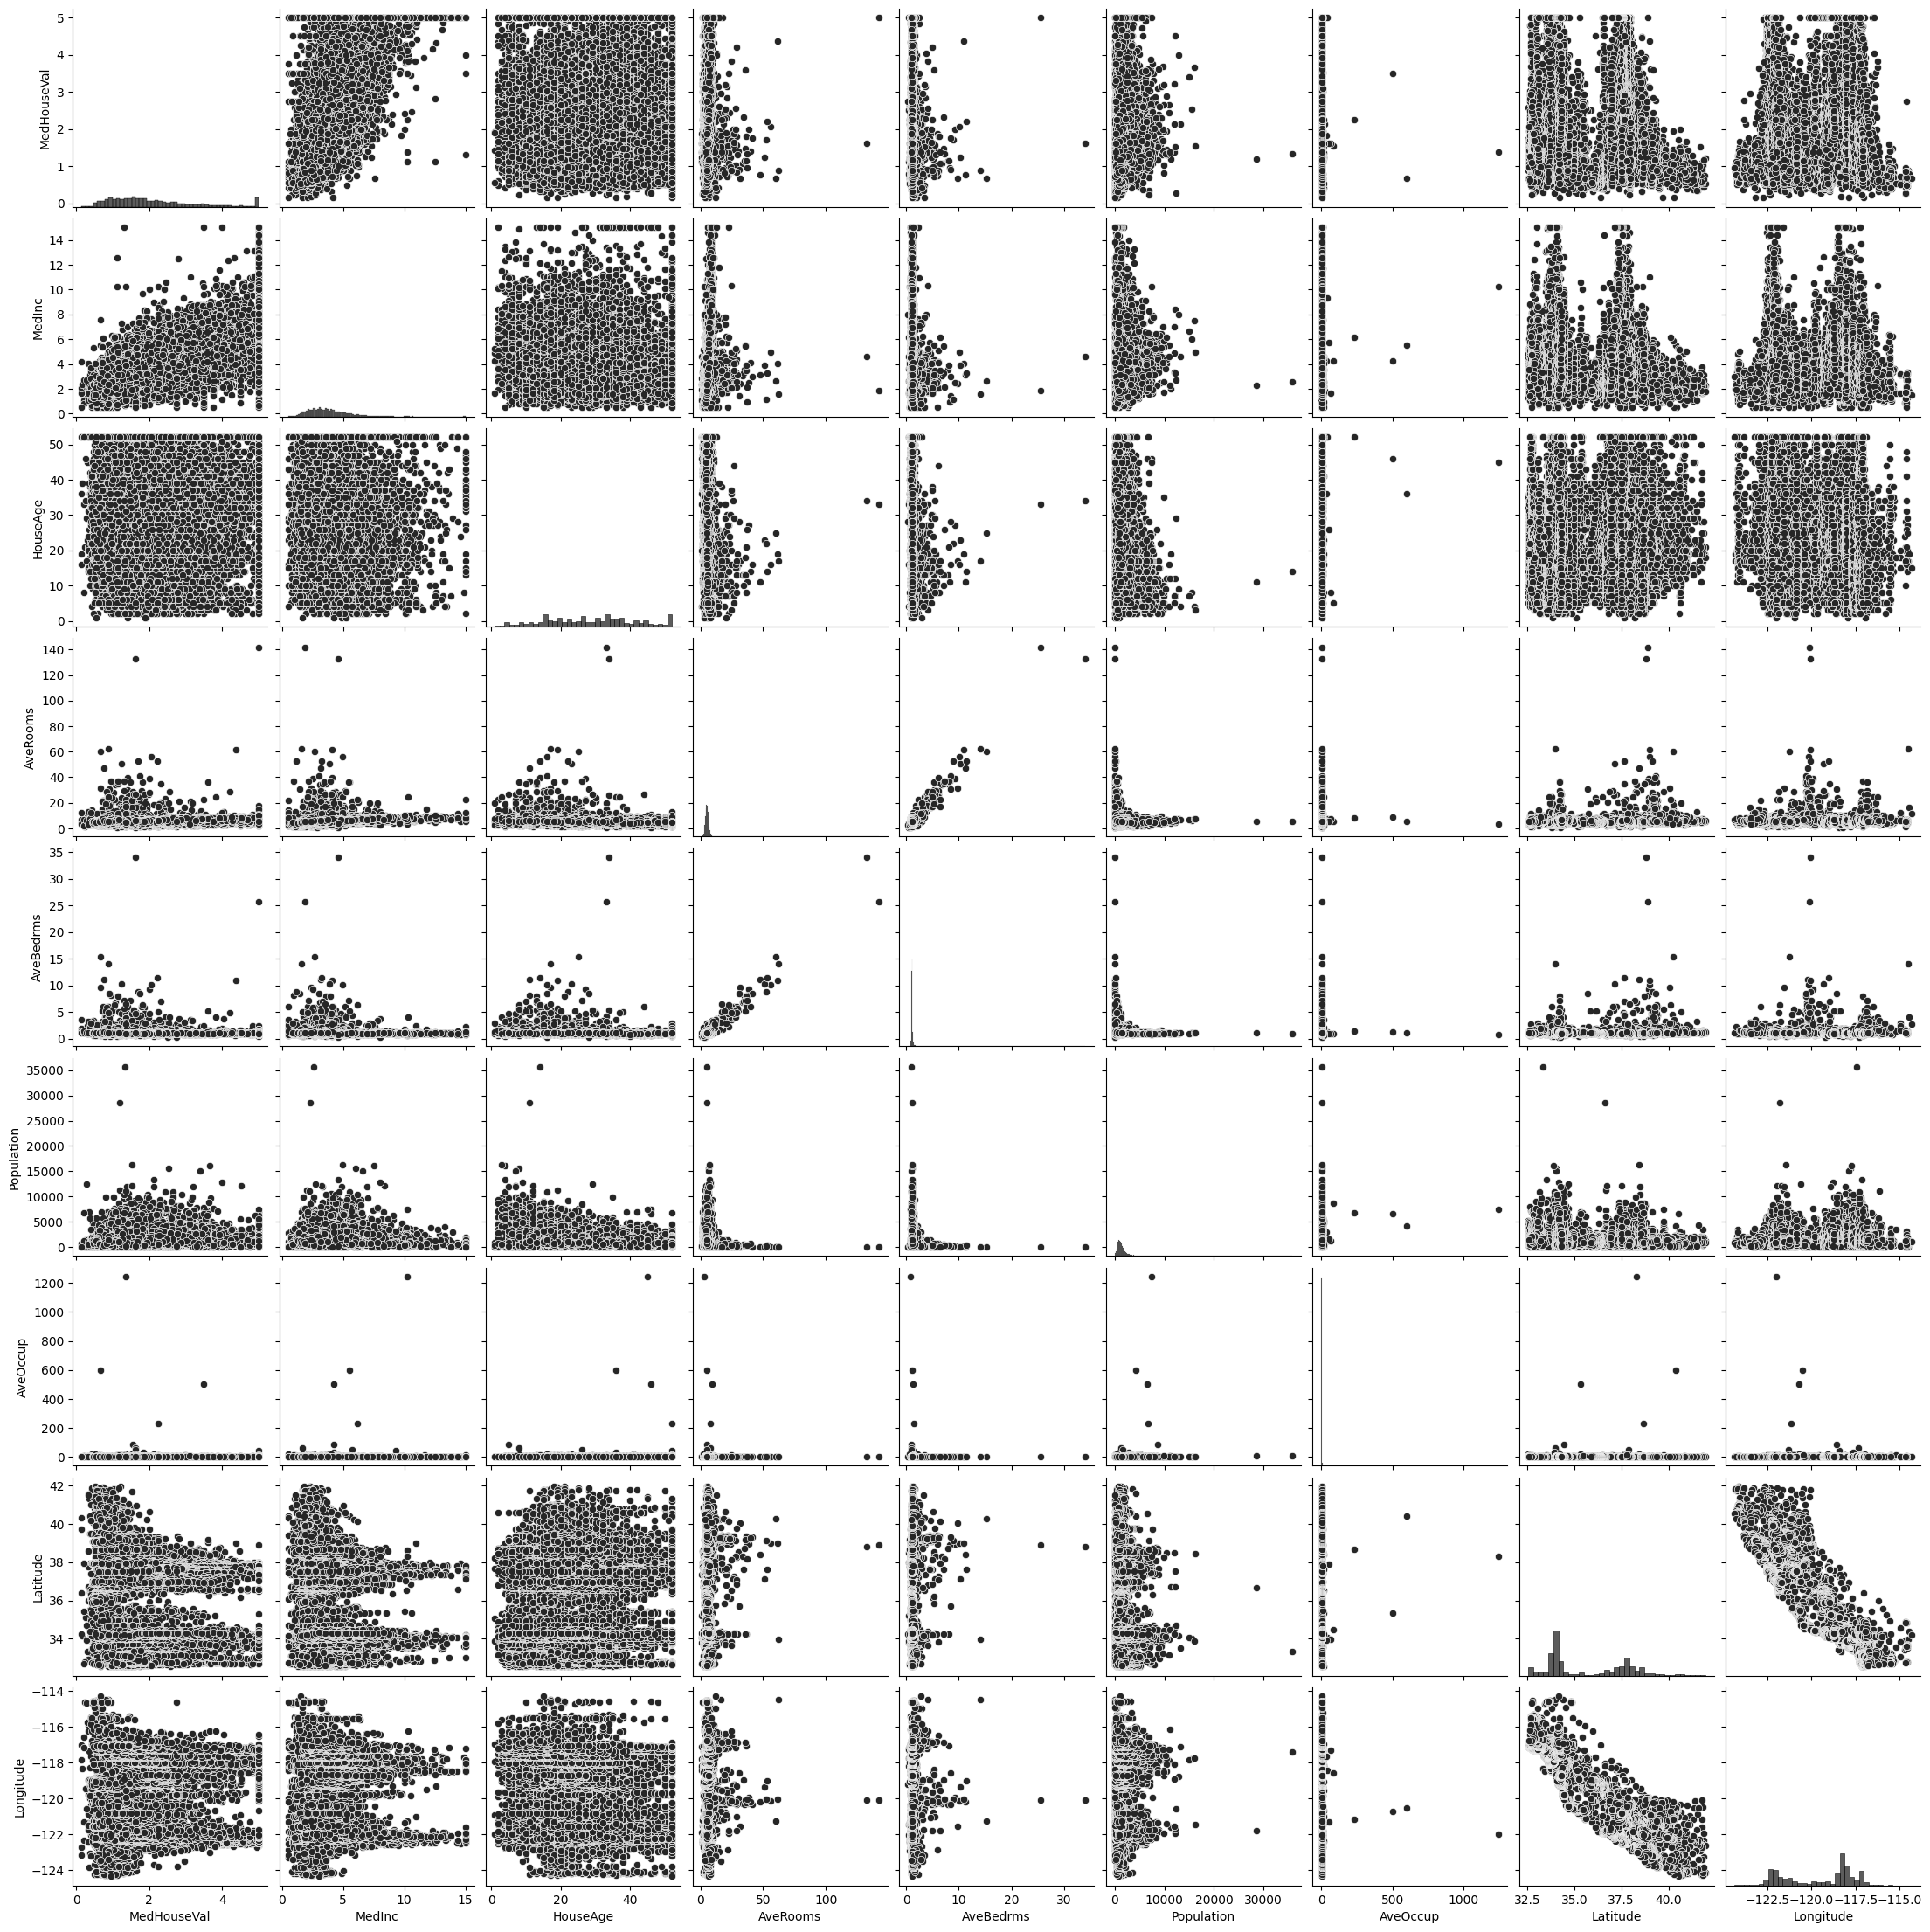

In [7]:
housingxy = pd.concat([housingy, housingX], axis=1)
graphxy = sns.pairplot(housingxy)

### Preparing data for predictive modeling

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    housingX, housingy, test_size=0.2, random_state=17
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [9]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18403,5.4741,24.0,6.587799,1.060181,4017.0,3.311624,37.24,-121.84
13405,1.9583,7.0,5.362805,1.442073,1064.0,3.243902,34.10,-117.46
9539,2.6058,40.0,3.885714,0.914286,785.0,4.485714,37.39,-120.71
8668,4.5817,30.0,4.146135,1.108696,1526.0,1.842995,33.82,-118.39
9019,8.0137,9.0,7.734673,1.041211,12873.0,3.274739,34.16,-118.78


### XGBoost predictive model settings and model training

In [17]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
housevalue_regressor = xgb.XGBRegressor()

In [11]:
housevalue_regressor.fit(
    X_train,y_train,
    eval_set=[(X_test, y_test),(X_train,y_train)]
)

[0]	validation_0-rmse:0.93417	validation_1-rmse:0.93744
[1]	validation_0-rmse:0.80544	validation_1-rmse:0.79501
[2]	validation_0-rmse:0.72406	validation_1-rmse:0.70244
[3]	validation_0-rmse:0.66749	validation_1-rmse:0.63818
[4]	validation_0-rmse:0.63751	validation_1-rmse:0.60033
[5]	validation_0-rmse:0.61189	validation_1-rmse:0.56644
[6]	validation_0-rmse:0.58620	validation_1-rmse:0.53308
[7]	validation_0-rmse:0.57241	validation_1-rmse:0.51228
[8]	validation_0-rmse:0.56593	validation_1-rmse:0.50156
[9]	validation_0-rmse:0.55121	validation_1-rmse:0.48426
[10]	validation_0-rmse:0.54240	validation_1-rmse:0.47137
[11]	validation_0-rmse:0.53708	validation_1-rmse:0.46342
[12]	validation_0-rmse:0.53323	validation_1-rmse:0.45607
[13]	validation_0-rmse:0.53001	validation_1-rmse:0.45001
[14]	validation_0-rmse:0.52530	validation_1-rmse:0.44200
[15]	validation_0-rmse:0.52239	validation_1-rmse:0.43719
[16]	validation_0-rmse:0.52073	validation_1-rmse:0.43158
[17]	validation_0-rmse:0.51860	validation

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Making a prediction using XGBoost

In [12]:
y_score = housevalue_regressor.predict(X_test)

In [13]:
predicter_r2 = r2_score(y_true=y_test, y_pred=y_score)
print(predicter_r2)

0.8167135465189188


In [18]:
predicter_rmse = root_mean_squared_error(
    y_true=y_test, y_pred=y_score
)
print(predicter_rmse)

0.48955245051753077


<Axes: xlabel='MedHouseVal'>

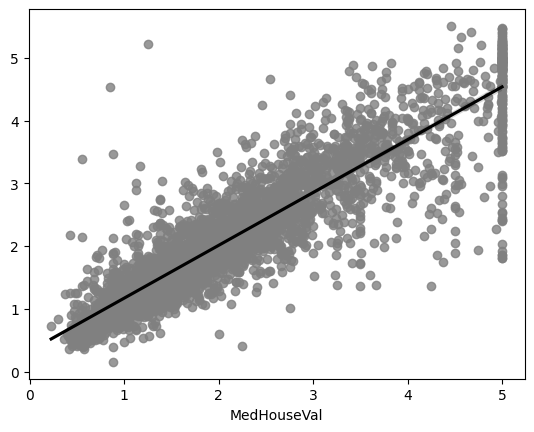

In [19]:
sns.regplot(
    x=y_test, y=y_score,
    scatter_kws={"color": "grey"},
    line_kws={"color": "black"}
)

In [20]:
residuals = y_test - y_score

In [21]:
X_testResiduals = pd.concat([X_test, residuals], axis=1)
X_testResiduals.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18403,5.4741,24.0,6.587799,1.060181,4017.0,3.311624,37.24,-121.84,-0.443082
13405,1.9583,7.0,5.362805,1.442073,1064.0,3.243902,34.10,-117.46,0.097641
9539,2.6058,40.0,3.885714,0.914286,785.0,4.485714,37.39,-120.71,-0.005543
8668,4.5817,30.0,4.146135,1.108696,1526.0,1.842995,33.82,-118.39,0.735812
9019,8.0137,9.0,7.734673,1.041211,12873.0,3.274739,34.16,-118.78,-0.051286


Text(0.5, 1.0, 'Longitude')

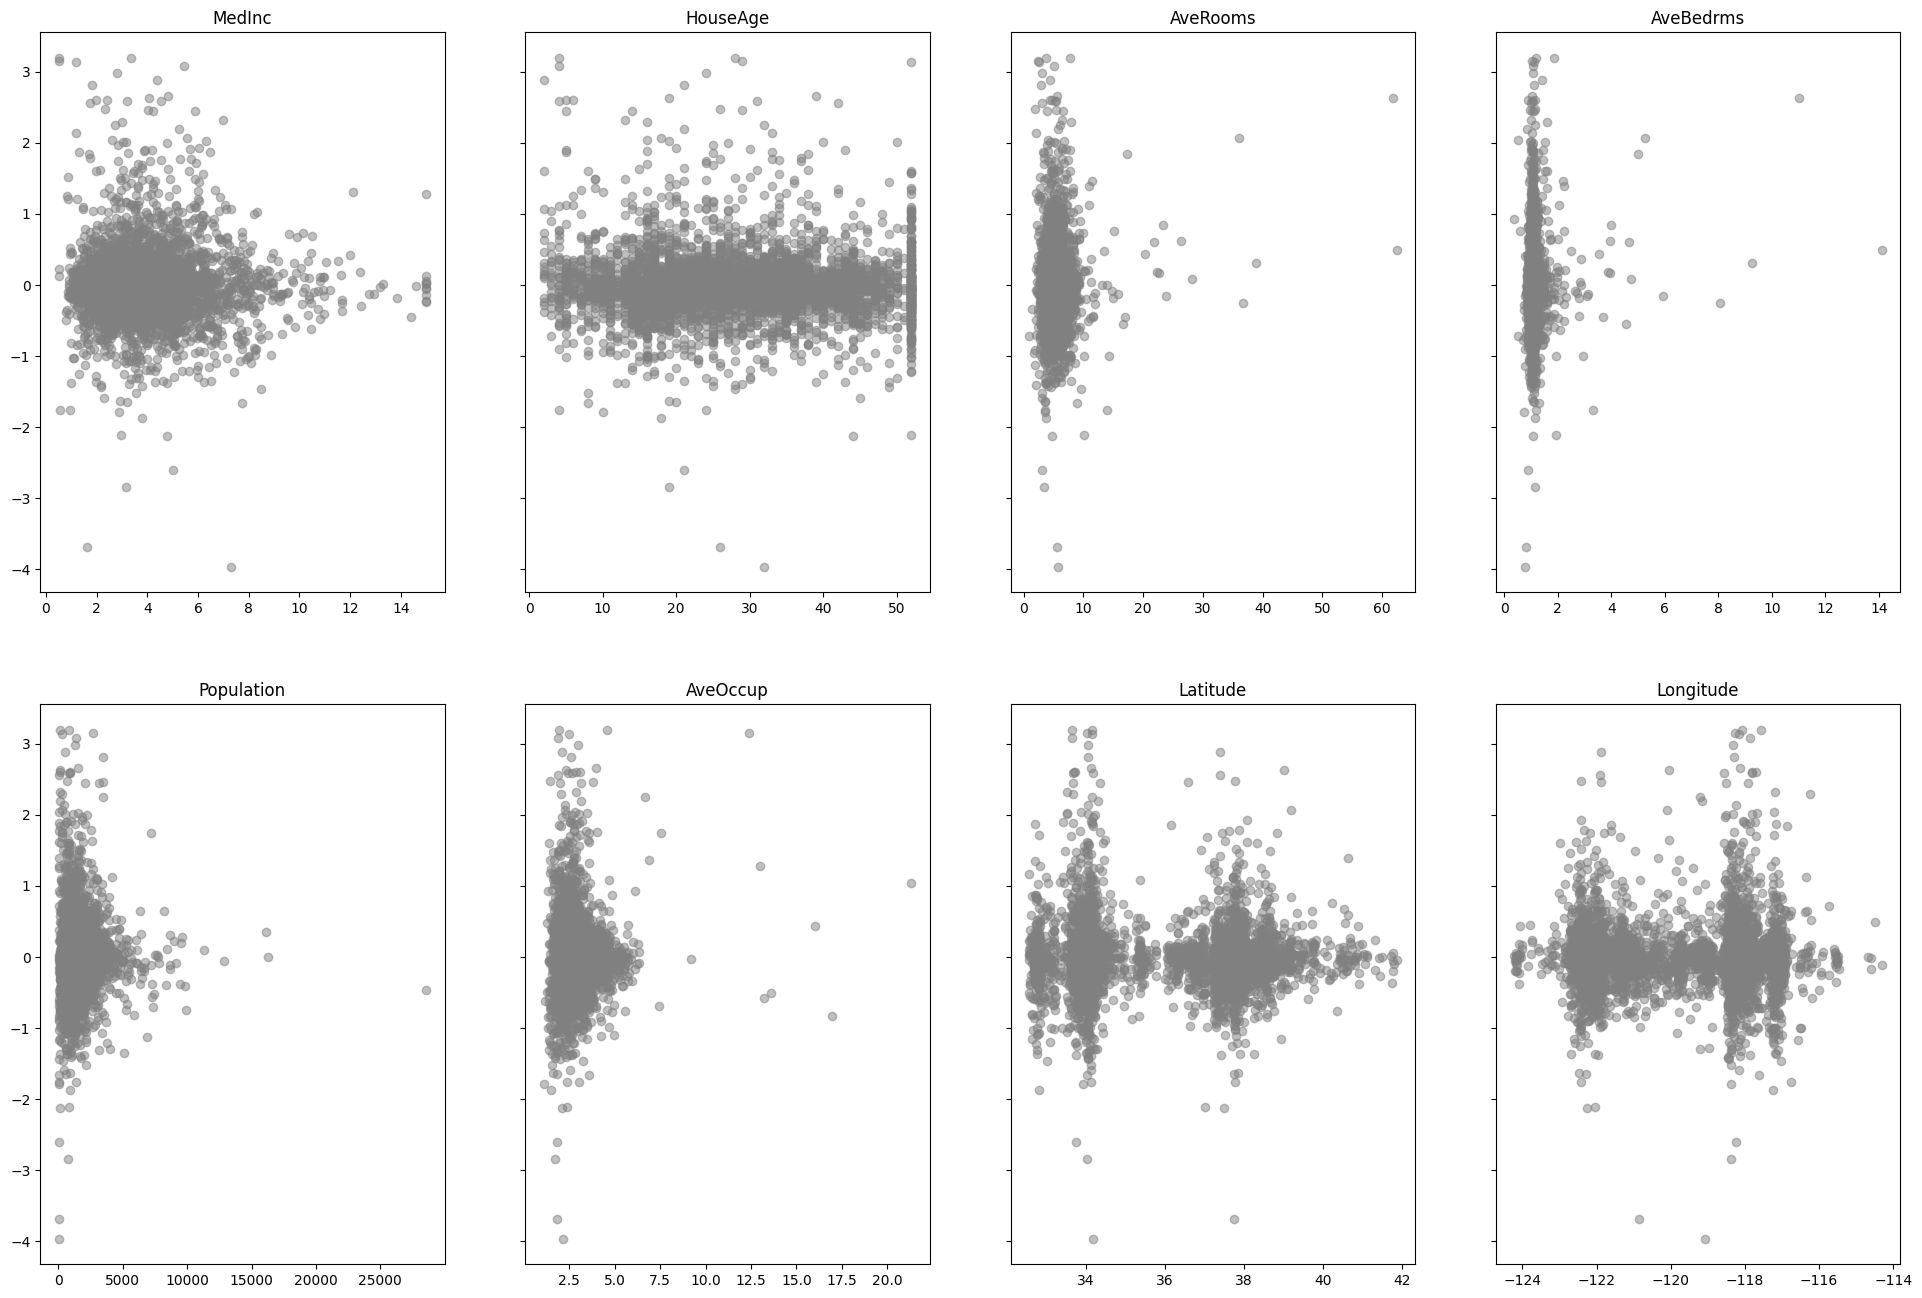

In [22]:
fig, axes = plt.subplots(
    nrows=2, ncols=4, figsize=(24,16), sharey=True)
axes[0,0].scatter(x=X_testResiduals["MedInc"],
    y=X_testResiduals["MedHouseVal"],
    alpha=0.5, color="grey")
axes[0,0].set_title("MedInc")
axes[0,1].scatter(x=X_testResiduals["HouseAge"],
    y=X_testResiduals["MedHouseVal"],
    alpha=0.5, color="grey")
axes[0,1].set_title("HouseAge")
axes[0,2].scatter(x=X_testResiduals["AveRooms"],
    y=X_testResiduals["MedHouseVal"],
    alpha=0.5, color="grey")
axes[0,2].set_title("AveRooms")
axes[0,3].scatter(x=X_testResiduals["AveBedrms"],
    y=X_testResiduals["MedHouseVal"],
    alpha=0.5, color="grey")
axes[0,3].set_title("AveBedrms")
axes[1,0].scatter(x=X_testResiduals["Population"],
    y=X_testResiduals["MedHouseVal"],
    alpha=0.5, color="grey")
axes[1,0].set_title("Population")
axes[1,1].scatter(x=X_testResiduals["AveOccup"],
    y=X_testResiduals["MedHouseVal"],
    alpha=0.5, color="grey")
axes[1,1].set_title("AveOccup")
axes[1,2].scatter(x=X_testResiduals["Latitude"],
    y=X_testResiduals["MedHouseVal"],
    alpha=0.5, color="grey")
axes[1,2].set_title("Latitude")
axes[1,3].scatter(x=X_testResiduals["Longitude"],
    y=X_testResiduals["MedHouseVal"],
    alpha=0.5, color="grey")
axes[1,3].set_title("Longitude")